In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit - William Bellon & Simon Jehenne-Cousty

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [1]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [3]:
# Répertoire cible dans votre projet
project_dir = r"H:\BUT3\SAE\sae_601"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r""
shutil.copy(cache_file, project_dir)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [4]:
# Lire le fichier depuis le répertoire du projet


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [25]:
#données manquantes 
données_manquantes = df.isnull().sum()
données_manquantes

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


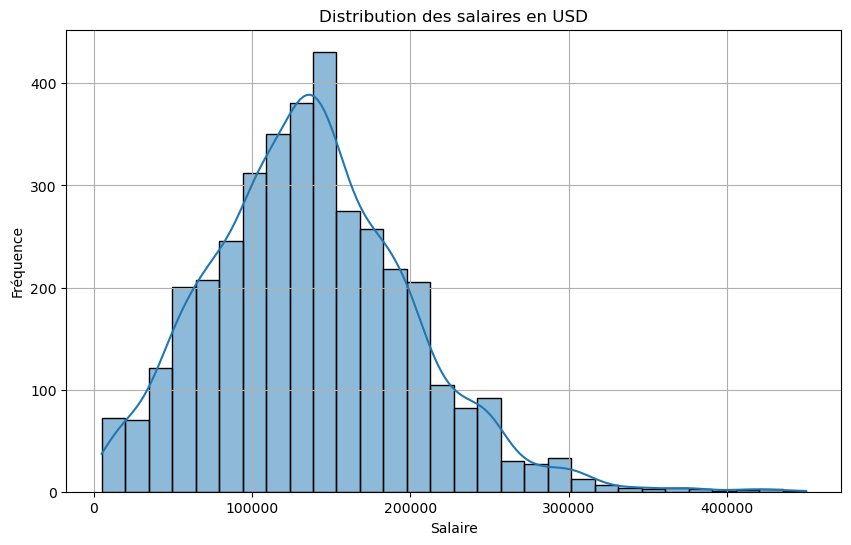

In [6]:
# Distribution des salaires en USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title("Distribution des salaires en USD")
plt.xlabel("Salaire")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [7]:
# liste des pays concerné par l'étude 
pays_concernes = df["company_location"].unique()
pays_concernes


array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [24]:
# Calculer le salaire moyen par rôle 
salaire_par_role = df.groupby("job_title")["salary_in_usd"].mean().reset_index()

# Calculer le salaire moyen par pays 
salaire_par_pays = df.groupby("company_location")["salary_in_usd"].mean().reset_index()

# Calculer le salaire moyen par niveau d'expérience
salaire_par_experience = df.groupby("experience_level")["salary_in_usd"].mean().reset_index()

#salaire_par_role
#salaire_par_pays
salaire_par_experience


,experience_level,salary_in_usd
0,EN,78546.284375
1,EX,194930.929825
2,MI,104525.939130
3,SE,153051.071542


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [26]:
# Filtrer les salaires pour un pays donné (ex : US)
pays_selectionne = "FR" 

salaires_pays = df[df["company_location"] == pays_selectionne]
salaires_pays

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
202,2023,SE,FT,Data DevOps Engineer,50000,EUR,53654,FR,50,FR,S
851,2023,MI,FT,Data Scientist,60000,EUR,64385,FR,50,FR,M
997,2023,MI,FT,Data Scientist,40000,USD,40000,FR,50,FR,L
1175,2023,SE,FT,Machine Learning Infrastructure Engineer,100000,EUR,107309,FR,100,FR,M
1176,2023,SE,FT,Machine Learning Infrastructure Engineer,70000,EUR,75116,FR,100,FR,M
1484,2022,SE,FT,Machine Learning Engineer,80000,EUR,84053,FR,50,FR,L
1857,2022,MI,FT,Data Scientist,90000,EUR,94560,FR,100,FR,M
1858,2022,MI,FT,Data Scientist,50000,EUR,52533,FR,100,FR,M
1970,2022,MI,FT,Computer Vision Engineer,56000,EUR,58837,FR,100,FR,S
2093,2022,MI,FT,Data Scientist,60000,EUR,63040,FR,100,FR,M


In [15]:
# Top 5 des entreprises qui paient le plus
top_entreprises = df.groupby("company_location")["salary_in_usd"].mean().reset_index()
top_entreprises = top_entreprises.sort_values(by="salary_in_usd", ascending=False).head(5)

top_entreprises

,company_location,salary_in_usd
37,IL,271446.500000
59,PR,167500.000000
70,US,151822.009539
62,RU,140333.333333
12,CA,131917.689655


In [67]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

roles_salaire_eleve = df.groupby("job_title")["salary_in_usd"].mean().reset_index()
roles_salaire_eleve = roles_salaire_eleve[roles_salaire_eleve["salary_in_usd"] > 100000]



# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)

pays_télétravail = df.groupby("company_location")["remote_ratio"].mean().reset_index()
pays_télétravail = pays_télétravail[pays_télétravail["remote_ratio"]==100]

#roles_salaire_eleve
pays_télétravail



,company_location,remote_ratio
3,AR,100.0
13,CF,100.0
15,CL,100.0
18,CR,100.0
24,EG,100.0
40,IR,100.0
43,KE,100.0
52,MY,100.0
53,NG,100.0
56,PH,100.0


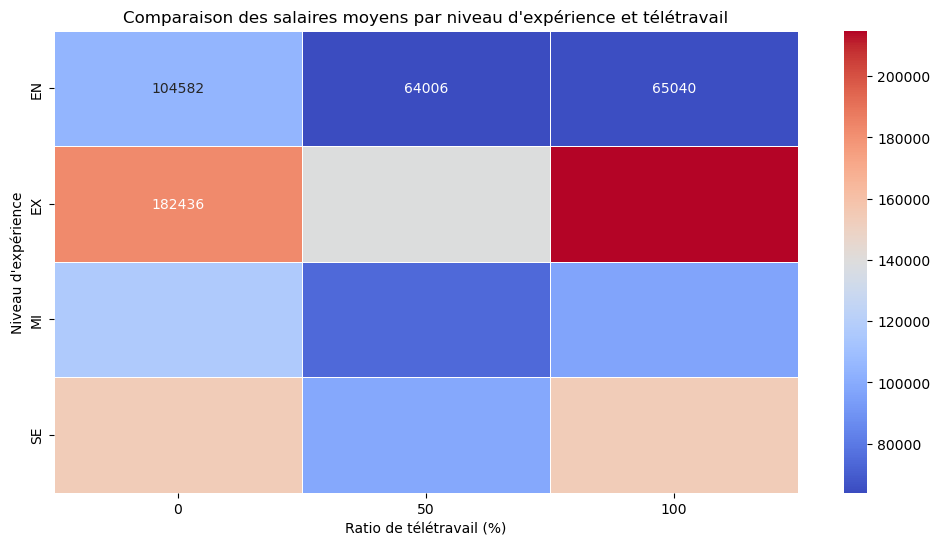

,job_title,experience_level,salary_in_usd
0,3D Computer Vision Researcher,EN,35000.000000
1,3D Computer Vision Researcher,MI,5409.000000
2,3D Computer Vision Researcher,SE,10000.000000
3,AI Developer,EN,130884.500000
4,AI Developer,MI,137510.000000
...,...,...,...
187,Research Scientist,SE,179892.979592
188,Software Data Engineer,MI,75020.000000
189,Software Data Engineer,SE,50000.000000
190,Staff Data Analyst,EX,15000.000000


In [70]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
salaire_moyen_remote = df[df["remote_ratio"] == 100]["salary_in_usd"].mean()


# Comparer salaires moyens pour deux catégories

#Niveau d'expérience et Télétravail
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

#mise en forme
plt.xlabel("Ratio de télétravail (%)")
plt.ylabel("Niveau d'expérience")
plt.title("Comparaison des salaires moyens par niveau d'expérience et télétravail")


plt.show()


#salaire_moyen_remote
comparaison_salaire


In [57]:
# Ajouter une colonne pour les fourchettes de salaires

#fourchettes salaires
bins = [0, 50000, 100000, 150000, 200000, 250000, 500000]
labels = ["<50k", "50k-100k", "100k-150k", "150k-200k", "200k-250k", ">250k"]

df["salary_range"] = pd.cut(df["salary_in_usd"], bins=bins, labels=labels, right=False)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50k-100k
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,<50k
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,<50k
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,150k-200k
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,>250k
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,150k-200k
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,100k-150k
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,100k-150k


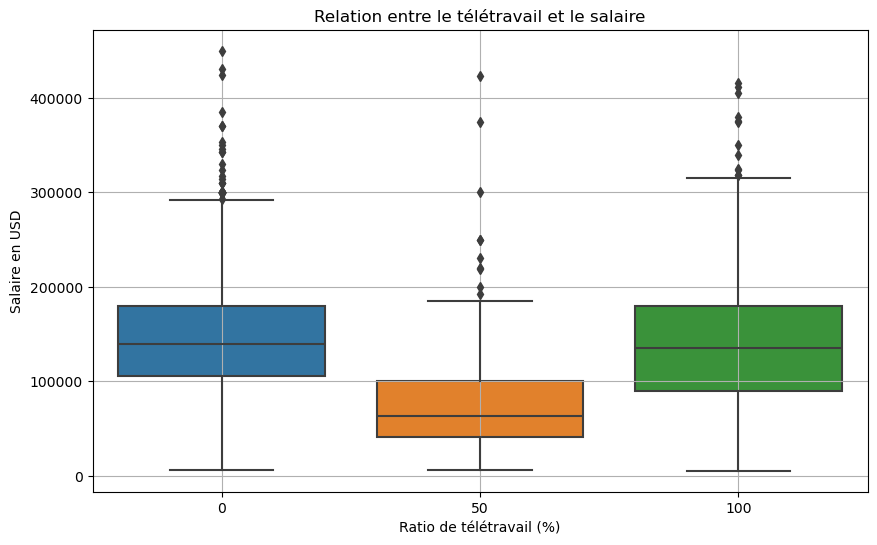

In [58]:
# Analyse des corrélations
# Relation entre télétravail et salaire
import matplotlib.pyplot as plt
import seaborn as sns

#graphique montrant la relation entre le taux de télétravail et le salaire
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["remote_ratio"], y=df["salary_in_usd"])

#mise en forme
plt.xlabel("Ratio de télétravail (%)")
plt.ylabel("Salaire en USD")
plt.title("Relation entre le télétravail et le salaire")
plt.grid(True)

plt.show()


In [59]:
# Salaire moyen par taille d'entreprise

#calcule salaire moyen par taille d'entreprise
salaire_par_taille_entreprise = df.groupby("company_size")["salary_in_usd"].mean().reset_index()

salaire_par_taille_entreprise

,company_size,salary_in_usd
0,L,118300.982379
1,M,143130.548367
2,S,78226.682432


In [63]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index="experience_level", 
    columns="remote_ratio", 
    values="salary_in_usd", 
    aggfunc="mean"
)

pivot_table

remote_ratio,0,50,100
experience_level,,,
EN,104581.765766,64006.230769,65040.486111
EX,182435.785714,139030.166667,214837.326923
MI,116723.103535,74214.405405,96803.480597
SE,154024.064706,98438.136364,154022.023381
